### Precision and Recall

투자 전략들을 고려하자. 이들 전략 중 일부는 기대 수익이 양이 아니라는 점에서 잘못된 발견이다. 이러한 전략 중 일부는 기대 수익이 양이 아니라는 점에서 잘못된 발견이다. 이러한 전략들을 참($S_T$)과 거짓($S_F$)으로 분해할 수 있다. 여기서 $S=S_T+S_F$.$\theta$를 거짓 전략에 대한 참된 전략의 승산비라 하면 $\theta=\frac{S_T}{S_F}$이다. 금융처럼 신호 대 잡음 비율이 낮은 분야에서는 거짓 전략이 난무하여 $\theta$는 낮을 것으로 예상된다. 참 투자 전략의 수는 다음과 같다.

$$S_T = S\frac{S_T}{S_T+S_F} = S\frac{\frac{S_T}{S_F}}{\frac{S_T+S_F}{S_F}} = S\frac{\theta}{1+\theta}$$

마찬자리고 거짓 투자 전략의 수는 다음과 같다.

$$S_F = S-S_T = S\left(1-\frac{\theta}{1+\theta}\right) = S\frac{1}{1+\theta}$$

거짓 양성률 $\alpha$(1종 오류)가 주어졌을 때 거짓 양성의 수 $\text{FP}=\alpha S_F$와 참 음성의 수 $\text{TP}=(1-\alpha)S_F$를 구할 수 있다. $\beta$를 이 $\alpha$와 연관된 거짓 음성률(2종 오류)이라고 표기하자. 거짓 음성의 수 $\text{FN} = \beta_{S_T}$와 참 양성의 수 $\text{TP} = (1-\beta)S_T$를 구할 수 있다. 따라서 이 경우 Precision과 Recall은 다음과 같다.

$$
\begin{align}
\text{Precision} =& \frac{\text{TP}}{\text{TP}+\text{FP}} = \frac{(1-\beta)S_T}{(1-\beta)S_T + \alpha S_F} \\
=& \frac{(1-\beta)S \frac{\theta}{1+\theta}}{1-\beta)S \frac{\theta}{1+\theta} + \alpha S\frac{1}{1+\theta}} = \frac{(1-\beta) \theta}{(1-\beta)\theta + \alpha} \\
\text{Recall} =& \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{(1-\beta)S_T}{(1-\beta)S_T + \beta S_T} = 1 - \beta
\end{align}
$$

전략에 대한 백테스트를 실행하기 이전에 연구자는 전략이 실제로 존재하는지의 증거를 수집해야 한다. 이유는 테스트의 정밀도가 승산비(odds ratio) $\theta$의 함수이기 때문이다. 만약 승산비가 낮으면 높은 신뢰도로 양성을 얻어도, 정밀도가 낮을 것이다. 특히 전략은 만약 $(1-\beta)\theta<\alpha$라면 참보다 거짓이기 쉽다.

예를 들어, 백테스트 전략이 수익성이 있을 확률이 0.01이라고 가정하자. 즉 100개의 전략 중 하나가 참이고, 따라서 $\theta = \frac{1}{99}$이다. 그러면 $\alpha = 0.05$와 $\beta = 0.2$의 표준 임계값에서 연구자들은 1,000개의 시행에서 대략 58개의 양성을 얻을 것으로 예상한다. 여기서 대략 8개가 True Positive이고, 대략 50개가 False Positive이다. 이런 상황에서 0.05의 $p$-value는 86.09%(대략 $\frac{50}{58}$)의 거짓 발견율을 의미한다. 바로 이 이유로 금융에서의 대부분의 발견은 거짓일 가능성이 높다고 예상한다.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

theta = 1 / 99  # odds ratio

alpha_values = np.linspace(0.01, 0.1, 91)  # False Positive Rate (Type I Error)
beta_values = np.linspace(0.01, 0.5, 50)  # False Negative Rate (Type II Error)

precision_matrix = np.zeros((len(beta_values), len(alpha_values)))
recall_matrix = np.zeros((len(beta_values), len(alpha_values)))

for i, beta in enumerate(beta_values):
    for j, alpha in enumerate(alpha_values):
        precision = ((1 - beta) * theta) / ((1 - beta) * theta + alpha)
        recall = 1 - beta
        precision_matrix[i, j] = precision
        recall_matrix[i, j] = recall

In [28]:
import pandas as pd

precision_matrix = pd.DataFrame(
    precision_matrix, 
    index = np.round(beta_values,2), 
    columns = np.round(alpha_values,2)
)
recall_matrix = pd.DataFrame(
    recall_matrix, 
    index = np.round(beta_values,2), 
    columns = np.round(alpha_values,2)
)

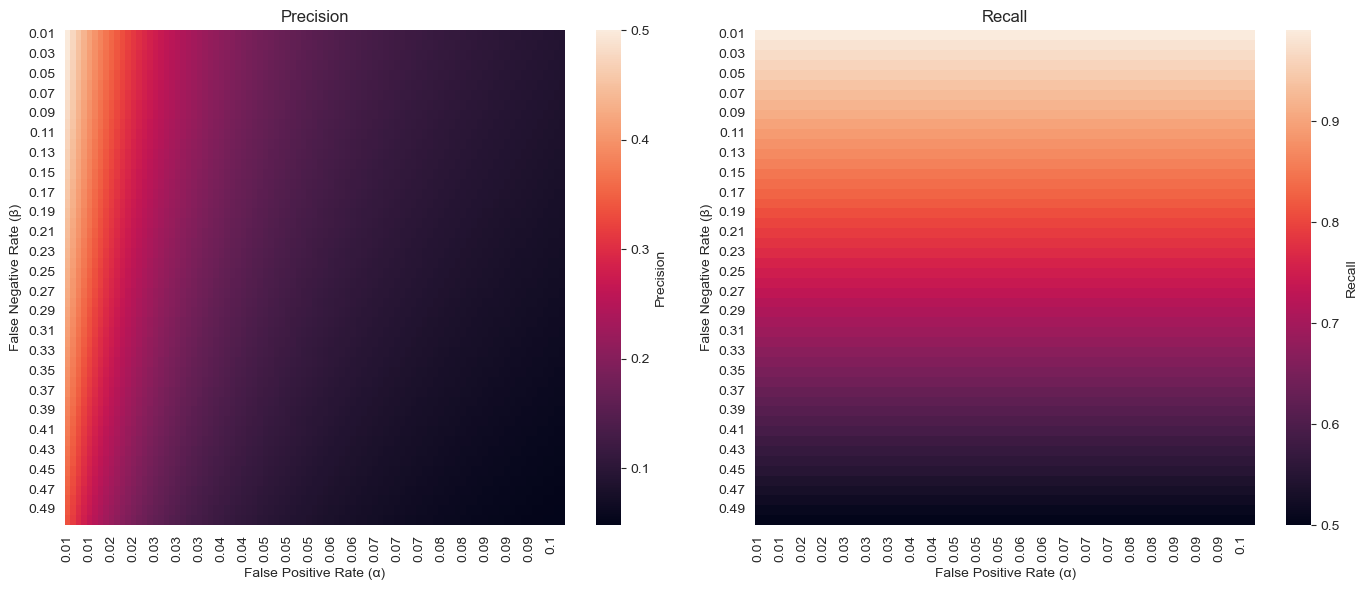

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Precision Heatmap
sns.heatmap(
    precision_matrix, 
    ax=axes[0], 
    cbar_kws={"label": "Precision"}
)
axes[0].set_xlabel("False Positive Rate (α)")
axes[0].set_ylabel("False Negative Rate (β)")
axes[0].set_title("Precision")

# Recall Heatmap
sns.heatmap(
    recall_matrix, 
    ax=axes[1], 
    cbar_kws={"label": "Recall"}
)
axes[1].set_xlabel("False Positive Rate (α)")
axes[1].set_ylabel("False Negative Rate (β)")
axes[1].set_title("Recall")

plt.tight_layout()
plt.show()

### Precision and Recall under Multiple Testing

한 번 시행 후 type 1 error를 범할 확률은 $\alpha$이다. 테스트를 거짓 양성 확률 $\alpha$로 테스트를 두 번째 반복한다고 가정한다. 각 시행에서 type 1 error를 하지 않을 확률은 $(1-\alpha)$이다. 만약 두 시행이 독립이면 첫째와 둘쨰 시행에서 type 1 error를 저지르지 않을 확률은 $(1-\alpha)^2$이다. 적어도 하나의 type 1 error를 저지를 확률은 보수인 $1 - (1-\alpha)^2$이다. 만약 $K$번의 독립 시행을 실행하면 하나의 type 1 error도 하지 않을 결합 확률은 $(1 - \alpha)^K$이다. 따라서 적어도 하나의 type 1 error를 범할 확률은 이의 보수(Complement)인 $\alpha_K = 1 - (1-\alpha)^K$이다. 이는 또한 Family-Wise Error Rate로 알려져 있다.

한 번 시행 후 type 2 error rate를 범할 확률은 $\beta$이다. $K$번의 독립 시행 후 모든 시행에서 type 2 error를 범할 확률은 $\beta_K = \beta^K$이다. $\text{FWER}$과의 차이를 주목하자. False Positive의 경우에는 적어도 하나의 오류를 범할 확률에 관심을 갖는다. 이는 단 하나의 거짓 경보도 실패이기 때문이다. 그러나 False Negative의 경우에는 모든 양성을 놓치는 확률에 관심을 갖는다. $K$가 증가함에 따라 $\alpha_K$는 증가하고 $\beta_K$는 감소한다.

다중 테스트를 조정한 Precision과 Recall은 다음과 같다.

$$
\begin{align}
\text{Precision} =& \frac{(1-\beta_K)\theta}{(1-\beta_K)\theta + \alpha_K} = \frac{(1-\beta_K)\theta}{(1-\beta^K)\theta + 1 - (1-\alpha)^K} \\ 
\text{Recall} =& 1 - \beta_K = 1-\beta^K
\end{align}
$$

### Sharpe Ratio

금융 분석은 일반적으로 precision과 recall 관점에서 전략의 성과를 평가하지 않는다. 전략 성과의 가장 일반적인 측도는 Sharpe ratio이다. 다음은 전략이 거짓일 확률을 평가하는 framework를 개발할 것이다. 입력으로 발견 과정 동안 포착된 메타데이터와 함께 Sharpe ratio 추정치를 사용한다. 

Excess Return Rate가 $\{r_t\}, t = 1, \dots, T$인 전략을 고려하자. 여기서 $\{r_t\}$은 독립적이고 동일한 분포(IID)이고 정규 분포를 갖는다.

$$r_t \sim \mathcal{N}\left[ \mu,\sigma^2\right]$$

여기서 $\mathcal{N}\left[ \mu,\sigma^2\right]$는 평균 $\mu$이고 분산 $\sigma^2$인 정규 분포이다. Sharpe를 따라서 이와 같은 전략의 (비연율화된) Sharpe Ratio는 다음과 같이 정의된다.

$$\text{SR} = \frac{\mu}{\sigma}$$

Parameter $\mu$와 $\sigma$를 모르기 때문에 $\text{SR}$은 다음과 같이 추정된다.

$$\widehat{\text{SR}} = \frac{E\left[ \{r_t\}\right]}{\sqrt{V \left[\{r_t\}\right]}}$$

수익률이 IID 정규 분포라는 가정 하에 Lo(2002)는 $\widehat{\text{SR}}$의 점근 분포를 다음과 같이 도출했다.

$$\left(\widehat{\text{SR}} - \text{SR} \right) \xrightarrow{a} \mathcal{N} \left[ 0, \frac{1 + \frac{1}{2}\text{SR}^2}{T}\right]$$

그러나 실증적 증거는 헤지 펀드 수익률이 상당한 음의 외도와 양의 초과 첨도를 보인다. 수익률이 IID 정규분포라고 잘못 가정하면 false positive 확률을 매우 과소 추정할 수 있다. 수익률이 IID 비정규 분포로부터 추출된다는 가정 하에 Mertens(2002)는 $\widehat{\text{SR}}$을 다음과 같이 도출했다.

$$\left(\widehat{\text{SR}} - \text{SR} \right) \xrightarrow{a} \mathcal{N} \left[ 0, \frac{1 + \frac{1}{2} \text{SR}^2 - \gamma_3 \text{SR} + \frac{\gamma_4 - 3}{4} \text{SR}^2}{T}\right]$$

여기서 $\gamma_3$는 $\{r_t\}$의 왜도이고, $\gamma_4$는 $\{r_t\}$의 첨도이다. 곧 Christie(2005)와 Obdyke(2007)는 실제로 수익률이 정상성을 갖고 ergodic인 더 일반적인 가정하에서도 Mertens의 식이 유효하다는 것을 발견했다. 주요 발견은 수익률이 비정규 분포이더라도 $\widehat{\text{SR}}$은 여전히 정규 분포를 따른다는 것이다. 하지만 분산은 수익률의 왜도와 첨도에 부분적으로 의존한다.